In [121]:
# Libraries
from bs4 import BeautifulSoup, Comment
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import urllib
import urllib2
import re
import scipy.stats as stats
import unicodedata
import datetime
import requests
import requests_cache
requests_cache.install_cache('demo_cache')
%matplotlib inline

In [230]:
def timestamp_to_datetime(timestamp):
    return datetime.date(timestamp.year, timestamp.month, timestamp.day)

In [235]:
def fix_dates(df):
    df = df.reset_index()
    datetimes = []
    for timestamp in df['date']:
        datetimes.append(timestamp_to_datetime(timestamp))
    df['datetime'] = datetimes
    return df

In [232]:
def id_to_date(g_id):
    yr = int(g_id[:4])
    month = int(g_id[4:6])
    day = int(g_id[6:8])
    date = datetime.date(yr, month, day)
    return date

In [133]:
link = 'https://www.basketball-reference.com/boxscores/201802240GSW.html'
page = urllib.urlopen(link).read()
soup = BeautifulSoup(page, "lxml")

line_score = soup.find('div', id = 'all_line_score')#.find('div',class_='placeholder')

g_info = line_score.findAll(text=lambda text:isinstance(text, Comment))[0]
s2 = BeautifulSoup(g_info,'lxml')

s2.find('table').find_all('strong')

[<strong>80</strong>, <strong>112</strong>]

In [2]:
link = 'https://www.basketball-reference.com/boxscores/201802240GSW.html'
page = urllib.urlopen(link).read()
soup = BeautifulSoup(page, "lxml")

In [59]:
from selenium import webdriver
link = 'https://www.basketball-reference.com/boxscores/201802240GSW.html'

driver = webdriver.Chrome('/Users/danielalpert/Desktop/Thesis/chromedriver')
driver.get(link)
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [92]:
g_id = link[47:59]
g_id

'201802240GSW'

In [10]:
table = soup.find('div', {'id': 'div_line_score'})

In [11]:
table

<div class="overthrow table_container" id="div_line_score">\n<table class="suppress_all sortable stats_table now_sortable" data-cols-to-freeze="1" id="line_score"><thead><tr>\n<th>\xa0</th>\n<th colspan="5">Scoring</th>\n</tr></thead><caption>Line Score Table</caption><tbody>\n<tr class="thead" data-row="0">\n<th>\xa0</th>\n<th>1</th>\n<th>2</th>\n<th>3</th>\n<th>4</th>\n<th>T</th>\n</tr>\n<tr data-row="1">\n<td><a href="/teams/OKC/2018.html">OKC</a></td>\n<td class="center">19</td>\n<td class="center">26</td>\n<td class="center">21</td>\n<td class="center">14</td>\n<td class="center"><strong>80</strong></td>\n</tr>\n<tr data-row="2">\n<td><a href="/teams/GSW/2018.html">GSW</a></td>\n<td class="center">24</td>\n<td class="center">28</td>\n<td class="center">32</td>\n<td class="center">28</td>\n<td class="center"><strong>112</strong></td>\n</tr>\n</tbody></table>\n</div>

In [12]:
tds = table.find_all('td')

In [13]:
tds

[<td><a href="/teams/OKC/2018.html">OKC</a></td>,
 <td class="center">19</td>,
 <td class="center">26</td>,
 <td class="center">21</td>,
 <td class="center">14</td>,
 <td class="center"><strong>80</strong></td>,
 <td><a href="/teams/GSW/2018.html">GSW</a></td>,
 <td class="center">24</td>,
 <td class="center">28</td>,
 <td class="center">32</td>,
 <td class="center">28</td>,
 <td class="center"><strong>112</strong></td>]

In [21]:
team1 = str(tds[0].text)
team2 = str(tds[6].text)
score1 = int(tds[5].text)
score2 = int(tds[11].text)
team1, team2, score1, score2

('OKC', 'GSW', 80, 112)

In [ ]:
if score1 > score2

## OT Game

In [22]:
from selenium import webdriver
link = 'https://www.basketball-reference.com/boxscores/201802080WAS.html'

driver = webdriver.Chrome('/Users/danielalpert/Desktop/Thesis/chromedriver')
driver.get(link)
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [23]:
table = soup.find('div', {'id': 'div_line_score'})

In [24]:
table

<div class="overthrow table_container" id="div_line_score">\n<table class="suppress_all sortable stats_table now_sortable" data-cols-to-freeze="1" id="line_score"><thead><tr>\n<th>\xa0</th>\n<th colspan="6">Scoring</th>\n</tr></thead><caption>Line Score Table</caption><tbody>\n<tr class="thead" data-row="0">\n<th>\xa0</th>\n<th>1</th>\n<th>2</th>\n<th>3</th>\n<th>4</th>\n<th>OT</th>\n<th>T</th>\n</tr>\n<tr data-row="1">\n<td><a href="/teams/BOS/2018.html">BOS</a></td>\n<td class="center">26</td>\n<td class="center">23</td>\n<td class="center">26</td>\n<td class="center">23</td>\n<td class="center">12</td>\n<td class="center"><strong>110</strong></td>\n</tr>\n<tr data-row="2">\n<td><a href="/teams/WAS/2018.html">WAS</a></td>\n<td class="center">27</td>\n<td class="center">24</td>\n<td class="center">19</td>\n<td class="center">28</td>\n<td class="center">6</td>\n<td class="center"><strong>104</strong></td>\n</tr>\n</tbody></table>\n</div>

In [25]:
tds = table.find_all('td')

In [26]:
tds

[<td><a href="/teams/BOS/2018.html">BOS</a></td>,
 <td class="center">26</td>,
 <td class="center">23</td>,
 <td class="center">26</td>,
 <td class="center">23</td>,
 <td class="center">12</td>,
 <td class="center"><strong>110</strong></td>,
 <td><a href="/teams/WAS/2018.html">WAS</a></td>,
 <td class="center">27</td>,
 <td class="center">24</td>,
 <td class="center">19</td>,
 <td class="center">28</td>,
 <td class="center">6</td>,
 <td class="center"><strong>104</strong></td>]

In [27]:
team1 = str(tds[0].text)
team2 = str(tds[6].text)
score1 = int(tds[5].text)
score2 = int(tds[11].text)
team1, team2, score1, score2

('BOS', '110', 12, 28)

In [33]:
scores = table.find_all('strong')

In [40]:
score1 = int(scores[0].text)
score2 = int(scores[1].text)
score1, score2

(110, 104)

In [41]:
teams = table.find_all('a')

In [50]:
team1 = str(teams[0].text)
team2 = str(teams[1].text)
team1, team2

('BOS', 'WAS')

In [52]:
if score1 > score2:
    winner = team1
else:
    winner = team2
winner

'BOS'

In [137]:
def get_game_data(link):
    page = urllib.urlopen(link).read()
    soup = BeautifulSoup(page, "lxml")
    
    line_score = soup.find('div', id = 'all_line_score')#.find('div',class_='placeholder')
    score_info = line_score.findAll(text=lambda text:isinstance(text, Comment))[0]
    s2 = BeautifulSoup(score_info,'lxml')
    table = s2.find('table')
    
    g_id = str(link[47:59])
    date = id_to_date(g_id)
    
    #table = soup.find('div', {'id': 'div_line_score'})
    scores = table.find_all('strong')
    score1 = int(scores[0].text)
    score2 = int(scores[1].text)
    teams = table.find_all('a')
    team1 = str(teams[0].text)
    team2 = str(teams[1].text)
    
    if score1 > score2:
        winner = team1
    else:
        winner = team2
    
    df_line = pd.DataFrame({'g_id': [g_id], 'team1': [team1], 'team2': [team2],
                            'score1': [score1], 'score2': [score2], 'winner': [winner],
                            'date': [date]})
    
    return df_line

In [138]:
get_game_data(link)

,date,g_id,score1,score2,team1,team2,winner
0,2018-02-24,201802240GSW,80,112,OKC,GSW,GSW


## Box score links

In [81]:
link_df = pd.read_excel('data/box_score_link.xlsx')

In [82]:
links = list(link_df['links'])

In [145]:
len(links)

40989

In [146]:
get_game_data(links[0])

,date,g_id,score1,score2,team1,team2,winner
0,1983-10-28,198310280CLE,113,106,NYK,CLE,NYK


In [326]:
links[26783]

u'https://www.basketball-reference.com/boxscores/200610310LAL.html'

In [335]:
links[28091]

u'https://www.basketball-reference.com/boxscores/200706140CLE.html'

## Compile dataframe

In [147]:
from progressbar import ProgressBar
pbar = ProgressBar()

In [337]:
frames = []
for link in links[26783:28091]:
    frames.append(get_game_data(link))

In [338]:
df2007 = pd.concat(frames)

In [339]:
df2007

,date,g_id,score1,score2,team1,team2,winner
0,2006-10-31,200610310LAL,106,114,PHO,LAL,LAL
0,2006-10-31,200610310MIA,108,66,CHI,MIA,CHI
0,2006-11-01,200611010BOS,91,87,NOK,BOS,NOK
0,2006-11-01,200611010CHA,106,99,IND,CHA,IND
0,2006-11-01,200611010CLE,94,97,WAS,CLE,CLE
0,2006-11-01,200611010DET,105,97,MIL,DET,MIL
0,2006-11-01,200611010GSW,110,98,LAL,GSW,LAL
0,2006-11-01,200611010MEM,118,117,NYK,MEM,NYK
0,2006-11-01,200611010MIN,83,92,SAC,MIN,MIN
0,2006-11-01,200611010NJN,92,102,TOR,NJN,NJN


In [340]:
df2007.to_excel('data/win_data/win_data_2007.xlsx')

In [144]:
frames[3015]

,date,g_id,score1,score2,team1,team2,winner
0,1986-05-02,198605020DEN,115,116,HOU,DEN,DEN


## Load in data

In [298]:
game_df = pd.read_excel('data/win_data/win_data_2003.xlsx')
game_df = fix_dates(game_df)

In [299]:
season_ginis = pd.read_excel('data/season_ginis/ginis_all_mps.xlsx')

In [300]:
season_ginis.head()

,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,mp_power,season,team
0,0.339135,0.380267,0.304095,0.316359,0.306978,0.291840,0.280668,0.301138,0.312267,1,1986,ATL
1,0.543621,0.440636,0.382926,0.423777,0.442069,0.447969,0.465961,0.471541,0.504979,2,1986,ATL
2,0.683751,0.479867,0.463298,0.521441,0.557209,0.577763,0.592760,0.613532,0.649450,3,1986,ATL
3,0.775577,0.517269,0.534300,0.603199,0.648626,0.677483,0.692340,0.717915,0.748871,4,1986,ATL
4,0.365158,0.209956,0.163032,0.132804,0.176912,0.220609,0.244525,0.273521,0.326804,1,1986,BOS


In [301]:
gini_df = season_ginis[(season_ginis['season'] == 2003) & (season_ginis['mp_power'] == 2)]

In [302]:
playoff_df = game_df[game_df['datetime'] >= datetime.date(2003, 4, 19)]

In [303]:
playoff_df.head()

,index,date,g_id,score1,score2,team1,team2,winner,season,datetime
1189,1189,2003-04-19,200304190DAL,86,96,POR,DAL,DAL,2003,2003-04-19
1190,1190,2003-04-19,200304190IND,103,100,BOS,IND,BOS,2003,2003-04-19
1191,1191,2003-04-19,200304190NJN,96,109,MIL,NJN,NJN,2003,2003-04-19
1192,1192,2003-04-19,200304190SAC,90,96,UTA,SAC,SAC,2003,2003-04-19
1193,1193,2003-04-19,200304190SAS,96,95,PHO,SAS,PHO,2003,2003-04-19


In [304]:
gini1 = gini_df[gini_df['team'] == playoff_df.iloc[i]['team1']]['gini_9']
gini1.iloc[0]

0.46087111757585397

In [308]:
gini1_lst = []
gini2_lst = []
for i in range(len(playoff_df)):
    gini1 = gini_df[gini_df['team'] == playoff_df.iloc[i]['team1']]['gini_9']
    gini2 = gini_df[gini_df['team'] == playoff_df.iloc[i]['team2']]['gini_9']
    
    gini1_lst.append(gini1.iloc[0])
    gini2_lst.append(gini2.iloc[0])

In [310]:
playoff_df['gini1'] = gini1_lst
playoff_df['gini2'] = gini2_lst
playoff_df['team1_win'] = [True if t1 == w else False for t1, w in zip(playoff_df['team1'], playoff_df['winner'])]

/Users/danielalpert/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/danielalpert/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/danielalpert/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [311]:
playoff_df.head()

,index,date,g_id,score1,score2,team1,team2,winner,season,datetime,gini1,gini2,team1_win
1189,1189,2003-04-19,200304190DAL,86,96,POR,DAL,DAL,2003,2003-04-19,0.368997,0.533930,False
1190,1190,2003-04-19,200304190IND,103,100,BOS,IND,BOS,2003,2003-04-19,0.584584,0.390796,True
1191,1191,2003-04-19,200304190NJN,96,109,MIL,NJN,NJN,2003,2003-04-19,0.441046,0.460871,False
1192,1192,2003-04-19,200304190SAC,90,96,UTA,SAC,SAC,2003,2003-04-19,0.450450,0.373992,False
1193,1193,2003-04-19,200304190SAS,96,95,PHO,SAS,PHO,2003,2003-04-19,0.582993,0.515525,True


In [312]:
playoff_df

,index,date,g_id,score1,score2,team1,team2,winner,season,datetime,gini1,gini2,team1_win
1189,1189,2003-04-19,200304190DAL,86,96,POR,DAL,DAL,2003,2003-04-19,0.368997,0.533930,False
1190,1190,2003-04-19,200304190IND,103,100,BOS,IND,BOS,2003,2003-04-19,0.584584,0.390796,True
1191,1191,2003-04-19,200304190NJN,96,109,MIL,NJN,NJN,2003,2003-04-19,0.441046,0.460871,False
1192,1192,2003-04-19,200304190SAC,90,96,UTA,SAC,SAC,2003,2003-04-19,0.450450,0.373992,False
1193,1193,2003-04-19,200304190SAS,96,95,PHO,SAS,PHO,2003,2003-04-19,0.582993,0.515525,True
1194,1194,2003-04-20,200304200DET,99,94,ORL,DET,ORL,2003,2003-04-20,0.544927,0.423790,True
1195,1195,2003-04-20,200304200MIN,117,98,LAL,MIN,LAL,2003,2003-04-20,0.609750,0.478932,True
1196,1196,2003-04-20,200304200PHI,90,98,NOH,PHI,PHI,2003,2003-04-20,0.536697,0.587232,False
1197,1197,2003-04-21,200304210IND,77,89,BOS,IND,IND,2003,2003-04-21,0.584584,0.390796,False
1198,1198,2003-04-21,200304210SAC,95,108,UTA,SAC,SAC,2003,2003-04-21,0.450450,0.373992,False


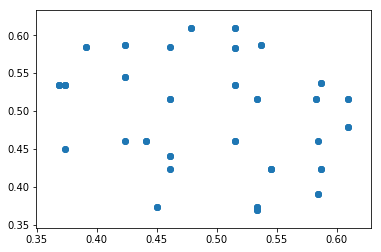

In [313]:

plt.scatter(playoff_df['gini1'], playoff_df['gini2'])
plt.show()